# Setup

you can use pygeos or rtree but you need to install before geopandas

In [1]:
!pip install pygeos

     |████████████████████████████████| 1.6MB 5.7MB/s 


In [2]:
!pip install geopandas

     |████████████████████████████████| 972kB 7.4MB/s 
     |████████████████████████████████| 14.8MB 306kB/s 
     |████████████████████████████████| 10.9MB 45.5MB/s 


In [3]:
!pip install owslib

     |████████████████████████████████| 204kB 6.3MB/s 


In [4]:
!pip install pyshp

     |████████████████████████████████| 225kB 8.5MB/s 
  Created wheel for pyshp: filename=pyshp-2.1.2-cp36-none-any.whl size=36216 sha256=bad82c6b1a93c88b9ed84aa5dc2110b494f1bd8b640bfc8230c7f0b501f037a9
  Stored in directory: /root/.cache/pip/wheels/96/6c/53/4112475adf3b831da97f083163d0f38ee6daac9c1b13f7afea
Successfully built pyshp


In [5]:
!pip install bmi-arcgis-restapi

     |████████████████████████████████| 491kB 5.1MB/s 
  Created wheel for bmi-arcgis-restapi: filename=bmi_arcgis_restapi-2.0.1-cp36-none-any.whl size=493541 sha256=e7fb342e7452cb841bbd169ac41760b50b87e9841cf6805e3c9a82c49370cc2f
  Stored in directory: /root/.cache/pip/wheels/e4/02/dc/526efc9aa697406a1aff272a704703ac88f790d599a1a23814
Successfully built bmi-arcgis-restapi


In [6]:
!pip install git+https://github.com/python-visualization/folium 

  Cloning https://github.com/python-visualization/folium to /tmp/pip-req-build-d9tn7arx
  Running command git clone -q https://github.com/python-visualization/folium /tmp/pip-req-build-d9tn7arx
  Created wheel for folium: filename=folium-0.11.0+20.gb70efc6-py2.py3-none-any.whl size=97529 sha256=2bb16e07f2f9b55169da3492df9996cc34c1d8ba4c3e7f335f2803f9c0d2707e
  Stored in directory: /tmp/pip-ephem-wheel-cache-gnib11ft/wheels/1e/e1/75/ecbc91fd5dd5d90befb0b533bf7492d38acffa033310731862
Successfully built folium
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.11.0+20.gb70efc6 which is incompatible.
  Found existing installation: folium 0.8.3
    Uninstalling folium-0.8.3:
      Successfully uninstalled folium-0.8.3


# Exercise

- find the administrative border of “comunità di valle” (community of valley) of Province Autonomous of Trento
- identify all the rivers inside the smallest community of valley of Trentino
- repeat the same exercise with the layer “Comuni Terremotati” (municipalities affected by earthquake) of the italian Civil Protection by choosing the smallest municipality contained on the layer

## find the administrative border of “comunità di valle” (community of valley) of Province Autonomous of Trento

In [7]:
from owslib.csw import CatalogueServiceWeb
from owslib.fes import PropertyIsLike, BBox
import geopandas as gpd
import folium

/usr/local/lib/python3.6/dist-packages/geopandas/_compat.py:88: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.8.1-CAPI-1.13.3). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


We start from the italian national repository - http://geodati.gov.it

In [8]:
csw = CatalogueServiceWeb("http://geodati.gov.it/RNDT/csw")

In [9]:
query = PropertyIsLike('csw:AnyText', 'Comunità di valle')

In [10]:
csw.getrecords2(constraints=[query],maxrecords=5)

In [11]:
for rec in csw.records:
  print(rec + " - " + csw.records[rec].title)

p_TN:58604ed2-ac1d-4f78-a00c-514fd3562c51 - Limite Comunità di valle
r_emiro:2015-06-04T161431 - Itinerari geologico-ambientali nella Valle del Marecchia
cnz_pvdt:4D17C962-1863-4C5F-8B01-AB8308A8CBB0 - Parco Ticino area della riserva della biosfera MAB Ticino Valley
p_bz:b4ee7976-5fa9-4fab-bbd6-4064bf568767 - Amministrazione: comunità comprensoriali
r_lombar:DC961855-02B4-46A8-93A9-1FE3D5E4FB4F - Alpeggi


In [12]:
id_record="p_TN:58604ed2-ac1d-4f78-a00c-514fd3562c51"

In [13]:
record = csw.records[id_record]

In [14]:
record.abstract

"Rappresenta il limite delle Comunità di valle, le quali sono enti pubblici locali a struttura associativa costituiti obbligatoriamente dai comuni compresi in ciascun territorio individuato ai sensi dell'art.12 comma 2 (LP3-2006 art 14 comma2) ad esse e ai Comuni di Trento e Rovereto sono trasferite numerose competenze che ora sono in capo alla Provincia, ovviamente fatte salve le competenze dei comuni e delle amministrazioni separate dei beni di usi civico.Intesa tra la Provincia e il Consiglio delle Autonomie locali approvato nella seduta del 16 marzo 2007 concernente Individuazione dei territori delle Comunità ai sensi dell'articolo 12 della legge provinciale 16 giugno 2006, n. 3 (Norme in materia di governo dell'autonomia del Trentino).NB: PER LA TABELLA DEGLI ATTRIBUTI E' STATO UTILIZZATO IL SET DI CARATTERI UNICODE UTF-8"

In [15]:
for reference in record.references:
  print(reference['scheme'])
  print(reference['url'])

urn:x-esri:specification:ServiceType:ArcIMS:Metadata:Server
http://www.territorio.provincia.tn.it
urn:x-esri:specification:ServiceType:ArcIMS:Metadata:Server
https://siat.provincia.tn.it/IDT/vector/public/p_tn_58604ed2-ac1d-4f78-a00c-514fd3562c51.zip
urn:x-esri:specification:ServiceType:ArcIMS:Metadata:Document
https://geodati.gov.it/geoportalRNDTPA/csw?getxml=%7BA0C53BE3-34E8-4EC1-9FD9-348BFE2833AD%7D


In [16]:
valley_communities = gpd.read_file('https://siat.provincia.tn.it/IDT/vector/public/p_tn_58604ed2-ac1d-4f78-a00c-514fd3562c51.zip')

In [17]:
valley_communities.head(5)

,objectid,classid,sede,nome,struttura,struttura_,dataini,datafine,fkfonte,fktfonte_d,fktipoelab,fktipoel_d,fkscala,fkscala_d,geometry
0,181,AMB002_14,ANDALO,COMUNITÀ DELLA PAGANELLA,S133,Servizio Catasto,2020/01/01 00:00:00.000,None,05,altre fonti,01,manuale,03,10000,"POLYGON ((659718.849 5118603.995, 659717.453 5..."
1,182,AMB002_8,TIONE DI TRENTO,COMUNITÀ DELLE GIUDICARIE,S133,Servizio Catasto,2020/01/01 00:00:00.000,None,05,altre fonti,01,manuale,03,10000,"POLYGON ((626847.878 5074565.314, 626878.525 5..."
2,183,AMB002_12,LAVARONE,MAGNIFICA COMUNITÀ DEGLI ALTIPIANI CIMBRI,S133,Servizio Catasto,2020/01/01 00:00:00.000,None,05,altre fonti,01,manuale,03,10000,"POLYGON ((675134.859 5087715.705, 675136.500 5..."
3,184,AMB002_15,TRENTO,TERRITORIO VAL D'ADIGE,S133,Servizio Catasto,2020/01/01 00:00:00.000,None,05,altre fonti,01,manuale,03,10000,"POLYGON ((663458.060 5094288.411, 663453.437 5..."
4,185,AMB002_1,CAVALESE,COMUNITÀ TERRITORIALE DELLA VAL DI FIEMME,S133,Servizio Catasto,2020/01/01 00:00:00.000,None,05,altre fonti,01,manuale,03,10000,"POLYGON ((681770.000 5126270.500, 681789.000 5..."


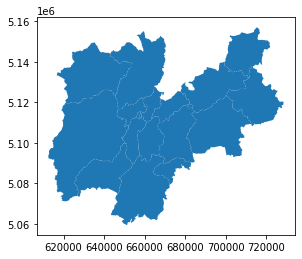

In [18]:
valley_communities.plot()

In [19]:
valley_communities.head(5)

,objectid,classid,sede,nome,struttura,struttura_,dataini,datafine,fkfonte,fktfonte_d,fktipoelab,fktipoel_d,fkscala,fkscala_d,geometry
0,181,AMB002_14,ANDALO,COMUNITÀ DELLA PAGANELLA,S133,Servizio Catasto,2020/01/01 00:00:00.000,None,05,altre fonti,01,manuale,03,10000,"POLYGON ((659718.849 5118603.995, 659717.453 5..."
1,182,AMB002_8,TIONE DI TRENTO,COMUNITÀ DELLE GIUDICARIE,S133,Servizio Catasto,2020/01/01 00:00:00.000,None,05,altre fonti,01,manuale,03,10000,"POLYGON ((626847.878 5074565.314, 626878.525 5..."
2,183,AMB002_12,LAVARONE,MAGNIFICA COMUNITÀ DEGLI ALTIPIANI CIMBRI,S133,Servizio Catasto,2020/01/01 00:00:00.000,None,05,altre fonti,01,manuale,03,10000,"POLYGON ((675134.859 5087715.705, 675136.500 5..."
3,184,AMB002_15,TRENTO,TERRITORIO VAL D'ADIGE,S133,Servizio Catasto,2020/01/01 00:00:00.000,None,05,altre fonti,01,manuale,03,10000,"POLYGON ((663458.060 5094288.411, 663453.437 5..."
4,185,AMB002_1,CAVALESE,COMUNITÀ TERRITORIALE DELLA VAL DI FIEMME,S133,Servizio Catasto,2020/01/01 00:00:00.000,None,05,altre fonti,01,manuale,03,10000,"POLYGON ((681770.000 5126270.500, 681789.000 5..."


## identify all the rivers inside the smallest community of valley of Trentino

### identify the smallest community of valley

In [20]:
smallest_community = valley_communities[valley_communities.area == valley_communities.area.min()]

In [21]:
smallest_community

,objectid,classid,sede,nome,struttura,struttura_,dataini,datafine,fkfonte,fktfonte_d,fktipoelab,fktipoel_d,fkscala,fkscala_d,geometry
10,191,AMB002_13,MEZZOCORONA,COMUNITÀ ROTALIANA-KÖNIGSBERG,S133,Servizio Catasto,2020/01/01 00:00:00.000,None,05,altre fonti,01,manuale,03,10000,"MULTIPOLYGON (((656059.164 5112838.836, 656030..."


In [22]:
smallest_community.nome

10    COMUNITÀ ROTALIANA-KÖNIGSBERG
Name: nome, dtype: object

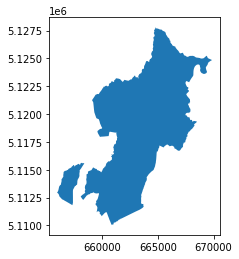

In [23]:
smallest_community.plot()

add it on a map ... only to understand where is the area on the bottom left corner ;)

In [24]:
centery = smallest_community.geometry.centroid.to_crs(epsg=4326).y
centerx = smallest_community.geometry.centroid.to_crs(epsg=4326).x
json_geometry = smallest_community.to_crs(epsg=4326).to_json()

In [25]:
map_area = folium.Map([centery,centerx], zoom_start=12,tiles='Stamen Terrain')
folium.GeoJson(json_geometry).add_to(map_area)
map_area

### find a layer with the rivers for the area


identify the bounding box

In [27]:
smallest_community.to_crs(epsg=4326).bounds

,minx,miny,maxx,maxy
10,11.019439,46.12501,11.203875,46.283791


In [28]:
bbox = list(smallest_community.to_crs(epsg=4326).bounds.values[0])

In [29]:
bbox

[11.01943938362622, 46.12500990155531, 11.203874962508163, 46.283790799274264]

in this case we can use the WFS of [the national cartographic portal of the Italian Ministry of the Environment](http://www.pcn.minambiente.it/)

In [30]:
#if you want use the CSW you can go here
csw = CatalogueServiceWeb("http://www.pcn.minambiente.it/geoportal/csw")

![](https://raw.githubusercontent.com/napo/geospatial_course_unitn/master/images/geocatalog_pcn_rivers.png)


[ ... ] 

In [31]:
from owslib.wfs import WebFeatureService

In [32]:
wfs_url="http://wms.pcn.minambiente.it/ogc?map=/ms_ogc/wfs/Aste_fluviali.map"

In [33]:
wfs = WebFeatureService(url=wfs_url,version="1.1.0")

In [34]:
wfs.identification.title

'Reticolo idrografico'

In [35]:
wfs.contents

{'ID.RETICOLO.CORSI_ACQUA': <owslib.feature.wfs110.ContentMetadata at 0x7efcb95e9a20>,
 'ID.RETICOLO.ELEMENTI_IDRICI': <owslib.feature.wfs110.ContentMetadata at 0x7efcb4dad470>,
 'ID.RETICOLO.FIUMI_PRINCIPALI_SECONDARI': <owslib.feature.wfs110.ContentMetadata at 0x7efcb95e96a0>,
 'ID.RETICOLO.FIUMI_TORRENTI': <owslib.feature.wfs110.ContentMetadata at 0x7efcb95e9a90>}

In [36]:
layer = list(wfs.contents)[2]

In [37]:
response = wfs.getfeature(typename=layer, bbox=bbox,srsname='urn:ogc:def:crs:EPSG::4326')

In [38]:
out = open('rivers_inbox.gml', 'wb')
out.write(response.read())
out.close()

In [39]:
rivers = gpd.read_file("rivers_inbox.gml")

In [40]:
rivers.head(3)

,gml_id,id_fiume,id_tratta,tipo,nome,foglio_igm,sottotipo,ordine,bacino_pri,bacino,da,tipo_da,a,tipo_a,annotazion,enabled,geometry
0,ID.RETICOLO.CORSI_ACQUA.9878,2241,11503,,,BOLZANO,1,3,ADIGE,,SORGENTE,1,NOCE,3,,1,"LINESTRING (46.17313 11.05670, 46.17069 11.060..."
1,ID.RETICOLO.CORSI_ACQUA.16150,688,14645,,,BOLZANO,1,2,ADIGE,,SORGENTE,1,ADIGE,3,,1,"LINESTRING (46.15510 11.03917, 46.15664 11.041..."
2,ID.RETICOLO.CORSI_ACQUA.20273,885,21041,TORRENTE,AVISIO,BOLZANO,1,2,ADIGE,,19357,3,21042,3,,1,"LINESTRING (46.17089 11.23801, 46.17053 11.237..."


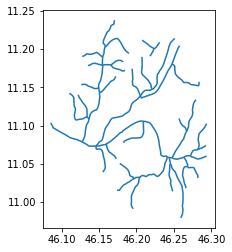

In [41]:
rivers.plot()

there is always the problem of the inverted axes
We can solve it with this function

In [42]:
import shapely

In [43]:
def swapxy(geometry):
  geometry = shapely.ops.transform(lambda x, y: (y, x),geometry)
  return geometry

In [44]:
rivers['geometry'] = rivers['geometry'].apply(lambda geometry: swapxy(geometry))

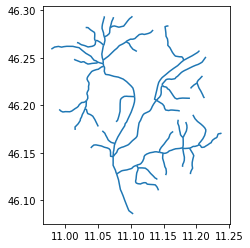

In [45]:
rivers.plot()

we are ready to plot on a map

In [46]:
y = rivers.unary_union.centroid.y
x = rivers.unary_union.centroid.x

In [47]:
map_rivers = folium.Map([y,x], zoom_start=11,tiles='Stamen Terrain')
folium.GeoJson(rivers.to_json()).add_to(map_rivers)
map_rivers

**CLIP**

we need to have all the rivers inside the area and not the bounding box



In [49]:
gpd.clip(rivers, smallest_community)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: EPSG:25832

  """Entry point for launching an IPython kernel.


,gml_id,id_fiume,id_tratta,tipo,nome,foglio_igm,sottotipo,ordine,bacino_pri,bacino,da,tipo_da,a,tipo_a,annotazion,enabled,geometry


the geodatamews have to use the same projection

In [50]:
rivers_rotaliana = gpd.clip(rivers.to_crs(epsg=4326), smallest_community.to_crs(epsg=4326))

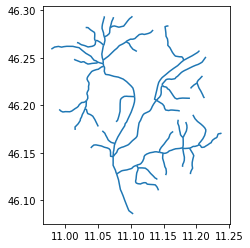

In [51]:
rivers.plot()

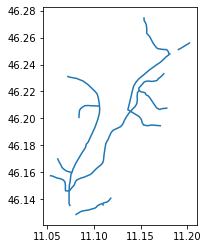

In [52]:
rivers_rotaliana.plot()

show the rivers on the map

In [53]:
folium.GeoJson(rivers_rotaliana.to_json()).add_to(map_area)


In [54]:
map_rivers



---


# repeat the same exercise with the layer “Comuni Terremotati” (municipalities affected by earthquake) of the italian Civil Protection by choosing the smallest municipality contained on the layer

In [56]:
import os
os.environ['RESTAPI_USE_ARCPY'] = 'FALSE'
import restapi

arcpy import error:  


/usr/local/lib/python3.6/dist-packages/restapi/common_types.py:35: UserWarning: No Arcpy found, some limitations in functionality may apply.
  warnings.warn('No Arcpy found, some limitations in functionality may apply.')


In [57]:
rest_url = 'https://services6.arcgis.com/L1SotImj1AAZY1eK/ArcGIS/rest/services'
ags = restapi.ArcServer(rest_url)

In [58]:
agc_service_name = ""
for service in ags.services:
  if service.name == 'Comuni_Terremotati':
    agc_service_name = service.name
    print(service.name)

Comuni_Terremotati


In [61]:
ags_service = ags.getService(agc_service_name)
ags_service.list_layers()

['comuni_terremotatiDD']

In [62]:
municipalities_affected_earthquake = ags_service.layer('comuni_terremotatiDD')

we can ask ArcGIS RestAPI to transform the source from the native projection to the [EPSG:25832](http://epsg.io/25832)

In [63]:
municipalities_affected_earthquake.export_layer('municipalities_affected_earthquake.shp', outSR=25832)

Created: "municipalities_affected_earthquake.shp"


'municipalities_affected_earthquake.shp'

In [64]:
geo_municipalities_affected_earthquake = gpd.read_file('municipalities_affected_earthquake.shp')

In [65]:
geo_municipalities_affected_earthquake.geometry

0     POLYGON ((825823.375 4744510.000, 825831.875 4...
1     POLYGON ((822188.875 4732801.000, 822431.125 4...
2     POLYGON ((836677.625 4755035.500, 838169.875 4...
3     POLYGON ((832493.438 4758169.000, 833177.312 4...
4     POLYGON ((858381.688 4751290.000, 858885.000 4...
5     POLYGON ((849760.438 4750082.500, 849961.000 4...
6     POLYGON ((846041.812 4765924.000, 846232.938 4...
7     POLYGON ((856514.062 4756610.000, 856643.063 4...
8     POLYGON ((850434.125 4761465.000, 850516.562 4...
9     POLYGON ((850348.125 4740939.500, 850545.437 4...
10    POLYGON ((856495.187 4734432.500, 856419.937 4...
11    POLYGON ((832470.375 4704205.500, 832598.125 4...
12    POLYGON ((860575.250 4723655.500, 860818.500 4...
13    POLYGON ((853776.938 4720760.500, 853849.438 4...
14    POLYGON ((845010.250 4723372.000, 845251.438 4...
15    POLYGON ((873001.312 4740017.500, 873145.937 4...
16    POLYGON ((871474.125 4750509.500, 871638.438 4...
Name: geometry, dtype: geometry

the values of the coordinates seems to be in meters

In [66]:
geo_municipalities_affected_earthquake.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

.. but the CRS is EPSG:426 ... we need to rewrite it!!!

In [67]:
geo_municipalities_affected_earthquake = geo_municipalities_affected_earthquake.set_crs(epsg=25832,allow_override=True)

In [68]:
geo_municipalities_affected_earthquake.crs

<Projected CRS: EPSG:25832>
Name: ETRS89 / UTM zone 32N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Europe - 6°E to 12°E and ETRS89 by country
- bounds: (6.0, 38.76, 12.0, 83.92)
Coordinate Operation:
- name: UTM zone 32N
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

Now is ok!

In [69]:
centery = geo_municipalities_affected_earthquake.to_crs(epsg=4326).geometry.unary_union.centroid.y
centerx = geo_municipalities_affected_earthquake.to_crs(epsg=4326).geometry.unary_union.centroid.x
json_geometry = geo_municipalities_affected_earthquake.to_crs(epsg=4326).to_json()

In [70]:
map_area = folium.Map([centery,centerx], zoom_start=10,tiles='Stamen Terrain')
folium.GeoJson(json_geometry).add_to(map_area)
map_area

In [74]:
minarea = geo_municipalities_affected_earthquake.geometry.area.min()

In [75]:
minarea

30665483.55191904

In [76]:
smallest_municipality = geo_municipalities_affected_earthquake[geo_municipalities_affected_earthquake.geometry.area == minarea]

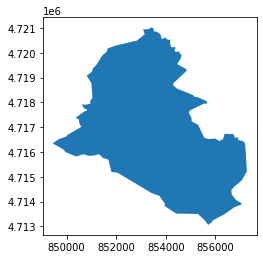

In [77]:
smallest_municipality.plot()

In [78]:
centery = smallest_municipality.to_crs(epsg=4326).geometry.unary_union.centroid.y
centerx = smallest_municipality.to_crs(epsg=4326).geometry.unary_union.centroid.x
json_geometry = smallest_municipality.to_crs(epsg=4326).to_json()

In [79]:
map_area = folium.Map([centery,centerx], zoom_start=13,tiles='Stamen Terrain')
folium.GeoJson(json_geometry).add_to(map_area)
map_area

In [83]:
smallest_municipality.COMUNE

13    Capitignano
Name: COMUNE, dtype: object

we can use the same WFS resource used before with the new bounding box

In [84]:
bbox= list(smallest_municipality.to_crs(epsg=4326).bounds.values[0])

In [85]:
response = wfs.getfeature(typename=layer, bbox=bbox,srsname='urn:ogc:def:crs:EPSG::4326')

In [86]:
out = open('rivers_capitignano.gml', 'wb')
out.write(response.read())
out.close()

In [87]:
rivers_capitignano = gpd.read_file("rivers_capitignano.gml")

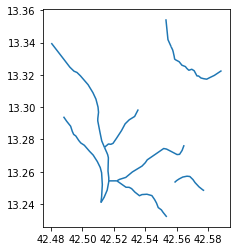

In [88]:
rivers_capitignano.plot()

... and we need always to invert the axes

In [89]:
rivers_capitignano['geometry'] = rivers_capitignano['geometry'].apply(lambda geometry: swapxy(geometry))

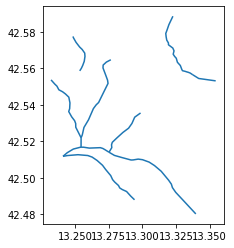

In [90]:
rivers_capitignano.plot()